Nicholsさんから頂いたサンプルイメージを表示する。

`ID = 16675`

`NAME = OEOW08FGQ`

`TIME = 2022-07-03T17:01:38:237000`

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from matplotlib.colors import LinearSegmentedColormap  # colormapをカスタマイズする

# matplotlib フォント設定
fontname = 'Nimbus Sans'
plt.rcParams.update({'font.sans-serif': fontname,
                     'font.family': 'sans-serif',
                     'mathtext.fontset': 'custom',
                     'mathtext.rm': fontname,
                     'mathtext.it': fontname+':italic',
                     # 'mathtext.bf': 'Nimbus Sans:italic:bold',
                     'mathtext.bf': fontname+':bold'
                     })

In [12]:
def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append((v / vmax, c))
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

cmapBLUES = generate_cmap(['#000000','#010E5E','#042AA6','#0F7CE0','#1AC7FF','#FFFFFF'])

In [13]:
sample = fits.getdata('data/sample/jup_22-184-17-01-58_0030_v08_stis_f25srf2_proj.fits')
width = sample.shape[1]
print('WIDTH OF THE SAMPLE IMAGE IS', width, 'PX.')

WIDTH OF THE SAMPLE IMAGE IS 500 PX.


In [14]:
# 情報を見る (header)
data = fits.open('data/sample/jup_22-184-17-01-58_0030_v08_stis_f25srf2_proj.fits')
print(repr(data[0].header))
data.close()

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NEXTEND =                    3                                                  
DATE    = '2022-07-03'                                                          
FILENAME= 'oeow08fgq_raw_30_0020.fits'                                          
FILETYPE= 'SCI     '                                                            
TELESCOP= 'HST     '                                                            
INSTRUME= 'STIS    '                                                            
EQUINOX =               2000.0                                                  
ROOTNAME= 'oeow08fgq'                                                           
PRIMESI = 'STIS    '        

In [15]:
data[0].header['DATE']

'2022-07-03'

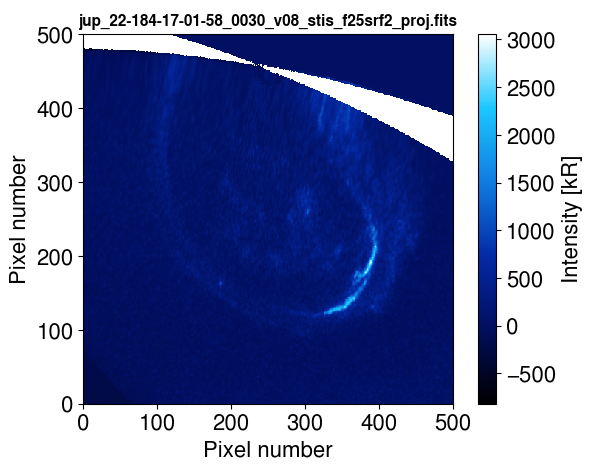

In [16]:
fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.set_title('jup_22-184-17-01-58_0030_v08_stis_f25srf2_proj.fits', weight='bold', fontsize=11)
ax.set_xlabel('Pixel number', fontsize=16)
ax.set_ylabel('Pixel number', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
cs = ax.pcolormesh(sample, vmin=None, vmax=None, cmap=cmapBLUES)
# cs = ax.contourf(sample, 200, vmin=0, vmax=1000, cmap=cmapBLUES)
pp = fig.colorbar(cs)
pp.ax.set_title(' ', fontsize=16)
pp.set_label('Intensity [kR]', fontsize=16)
pp.ax.tick_params(labelsize=16)
plt.show()

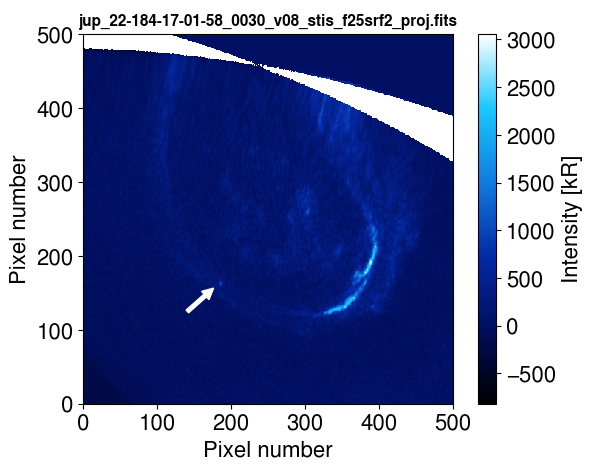

In [17]:
x0 = 178
y0 = 158
r0 = np.sqrt(x0**2 + y0**2)
phi = np.arctan2(y0,x0)
dx0 = 50*np.cos(phi)
dy0 = 50*np.sin(phi)

fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.set_title('jup_22-184-17-01-58_0030_v08_stis_f25srf2_proj.fits', weight='bold', fontsize=11)
ax.set_xlabel('Pixel number', fontsize=16)
ax.set_ylabel('Pixel number', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.arrow(x=x0-dx0, y=y0-dy0, dx=dx0*0.95, dy=dy0*0.95,
         width=5, head_width=15, head_length=15, length_includes_head=True, 
         color='#FFFFFF', zorder=1
         )
cs = ax.pcolormesh(sample, vmin=None, vmax=None, cmap=cmapBLUES, zorder=0.5)
# cs = ax.contourf(sample, 200, vmin=0, vmax=1000, cmap=cmapBLUES)
pp = fig.colorbar(cs)
pp.ax.set_title(' ', fontsize=16)
pp.set_label('Intensity [kR]', fontsize=16)
pp.ax.tick_params(labelsize=16)
plt.show()

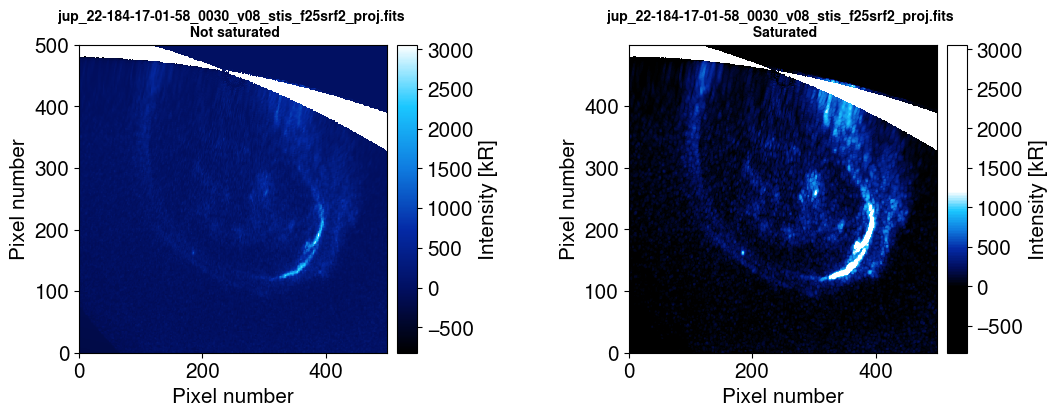

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(13,4), dpi=100)
ax[0].set_aspect('equal')
ax[0].set_title('jup_22-184-17-01-58_0030_v08_stis_f25srf2_proj.fits \n Not saturated', weight='bold', fontsize=10)
ax[0].set_xlabel('Pixel number', fontsize=15)
ax[0].set_ylabel('Pixel number', fontsize=15)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)
cs = ax[0].pcolormesh(sample, vmin=None, vmax=None, cmap=cmapBLUES)
axpos = ax[0].get_position()
pp_ax = fig.add_axes(
    [axpos.x1+axpos.height*0.01, axpos.y0, axpos.height*0.02, axpos.height])  # カラーバーのaxesを追加
pp = fig.colorbar(cs, cax=pp_ax, ticks=np.arange(-500,3001,500))
pp.ax.set_title(' ', fontsize=15)
pp.set_label('Intensity [kR]', fontsize=15)
pp.ax.tick_params(labelsize=15)

ax[1].set_aspect('equal')
ax[1].set_title('jup_22-184-17-01-58_0030_v08_stis_f25srf2_proj.fits \n Saturated', weight='bold', fontsize=10)
ax[1].set_xlabel('Pixel number', fontsize=15)
ax[1].set_ylabel('Pixel number', fontsize=15)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)
# cs = ax[1].pcolormesh(sample, vmin=None, vmax=None, cmap=cmapBLUES)
cs = ax[1].contourf(sample, 200, vmin=0, vmax=1200, cmap=cmapBLUES)
axpos = ax[1].get_position()
pp_ax = fig.add_axes(
    [axpos.x1+axpos.height*0.01, axpos.y0, axpos.height*0.02, axpos.height])  # カラーバーのaxesを追加
pp = fig.colorbar(cs, cax=pp_ax, ticks=np.arange(-500,3001,500))
pp.ax.set_title(' ', fontsize=15)
pp.set_label('Intensity [kR]', fontsize=15)
pp.ax.tick_params(labelsize=15)

plt.show()

In [19]:
# 情報を見る (header)
data = fits.open('data/sample/jup_22-142-10-30-41_0030_v06_stis_f25srf2_flatproj.fits')
# print(repr(data[0].header))
print(data[0].header['DATE'])
print(data[0].header['TDATEOBS'])
print(data[0].header['TTIMEOBS'])
OBSDATE = data[0].header['TDATEOBS'] +'T'+ data[0].header['TTIMEOBS']
print(OBSDATE)
data.close()

2022-05-22
2022-05-22
10:30:41
2022-05-22T10:30:41
